In [1]:
# import things
import KenGP as gp
import numpy as np
import pandas as pd
import numpy.linalg as la
import numpy.random as rand
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons

%load_ext autoreload
%autoreload 2


In [2]:
"""
# These are our constants
N = 5  # Number of variables
F = 8  # Forcing


def L96(x, t):
    #Lorenz 96 model with constant forcing
    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d


x0 = F * np.ones(N)  # Initial state (equilibrium)
x0[0] += 0.01  # Add small perturbation to the first variable
t = np.arange(0.0, 30.0, 0.01)

x = odeint(L96, x0, t)

# Plot the first three variables
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(x[:, 0], x[:, 1], x[:, 2])
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$x_3$")
plt.show()
"""

'\n# These are our constants\nN = 5  # Number of variables\nF = 8  # Forcing\n\n\ndef L96(x, t):\n    #Lorenz 96 model with constant forcing\n    # Setting up vector\n    d = np.zeros(N)\n    # Loops over indices (with operations and Python underflow indexing handling edge cases)\n    for i in range(N):\n        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F\n    return d\n\n\nx0 = F * np.ones(N)  # Initial state (equilibrium)\nx0[0] += 0.01  # Add small perturbation to the first variable\nt = np.arange(0.0, 30.0, 0.01)\n\nx = odeint(L96, x0, t)\n\n# Plot the first three variables\nfig = plt.figure()\nax = fig.gca(projection="3d")\nax.plot(x[:, 0], x[:, 1], x[:, 2])\nax.set_xlabel("$x_1$")\nax.set_ylabel("$x_2$")\nax.set_zlabel("$x_3$")\nplt.show()\n'

In [67]:
# Rossler System
def Rossler(xi, t):
    a = 0.2
    b = 0.2
    c = 5.7
    
    (x,y,z) = xi

    dx = -y - z
    dy = x + a * y
    dz = b + z * ( x - c )

    return np.array( [dx,dy,dz] )

def RosslerP(xi, t, a, b, c):    
    (x,y,z) = xi

    dx = -y - z
    dy = x + a * y
    dz = b + z * ( x - c )

    return np.array( [dx,dy,dz] )

def Lorenz(xi,t):
    rho = 25.0
    sigma = 10.0
    beta = 8.0 / 3.0
    
    (x,y,z) = xi
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def LorenzP(xi,t, rho, sigma, beta):
    
    (x,y,z) = xi
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

def Lorenz96(x, t):
    N = 5 # dimension
    F = 8

    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F
    return d    

def LorenzYang(xi, t):
    k1 = lambda t : -0.01*(t**2)
    k2 = lambda t : 0.01*t
    k3 = lambda t : 0.01*t
    k4 = lambda t : -0.01*(t ** 2)

    rho = 28.0
    sigma = 10.0
    beta = 8.0 / 3.0
    
    (x,y,z) = xi
    return -sigma*(x-y)+k1(t)*y, rho*x-y-x*z+k2(t)*z, -beta*z+x*y+(k3(t)+k4(t))*y  # Derivatives

def Sprott(xi, t):
    (x,y,z) = xi
    return ( y, -x - np.sign(z)*y, y**2 - np.exp(-x**2))

def SprottP(xi, t, d):
    (x,y,z) = xi
    return ( y/d, -x - d*np.sign(z)*y, y**2 - d*np.exp(-x**2))

def RosenzweigMacArthur(x, t, h2):
    c1 = 5.0
    h1 = 3.0
    c2 = 0.1
    m2 = 0.4
    m3 = 0.008
    
    dx = x[0]*(1-x[0]) - c1 * x[0] * x[1] / (1.0 + h1*x[0])
    dy = c1 * x[0] * x[1] / (1.0 + h1 * x[0]) - c2 * x[1] * x[2] / (1.0 + h2(t) * x[1]) - m2*x[1]
    dz = c2 * x[1] * x[2] / (1.0 + h2(t) * x[1]) - m3 * x[2]

    return (dx, dy, dz)

def Lorenz96P(x, t, F):
    N = 5 # dimension

    # Setting up vector
    d = np.zeros(N)
    # Loops over indices (with operations and Python underflow indexing handling edge cases)
    for i in range(N):
        d[i] = (x[(i + 1) % N] - x[i - 2]) * x[i - 1] - x[i] + F(t)
    return d   

In [68]:
def delayEmbed(Xin, Yin,assignment,embInterval):
    
    tmplen = Xin.shape[1]

    tmp = np.zeros([sum(x) for x in zip(Xin.shape,(0,sum(assignment)))])
    tmp[:,:Xin.shape[1]] = Xin
    Xin = tmp

    lag = 1
    newColInd = 0
    if len(assignment) != tmplen:
        print("Assigment list doesn't match the number of variables in data array! ",assignment)
        return
    else:
        # code that creates the lags
        for i in range(len(assignment)):
            lag = 1
            for _ in range(assignment[i]):
                newCol = Xin[:-embInterval*lag,i]
                Xin[embInterval*lag:, tmplen + newColInd] = newCol
                newColInd += 1
                lag += 1
    Xin = Xin[embInterval*sum(assignment):]
    Yin = Yin[embInterval*sum(assignment):]
    
    # Yin = Yin[-X.shape[0]:]
    
    return (Xin, Yin)

def standardize(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

def nearestNeighbors(s0, S, n):
    orderedNeighbors = np.argsort(la.norm(s0 - S[:-1],axis=1))
    return orderedNeighbors[1:n+1]

# Lyapunov Edition
def lyapunovExp(S):
    Lexp = 0
    n = S.shape[0]-1
    for i in range(n):
        nearNeighborsIndices = nearestNeighbors(S[i], S, 1)
        for nni in nearNeighborsIndices:
            fprime = la.norm(S[i+1] - S[nni+1]) / la.norm(S[i] - S[nni])
            Lexp += np.log(fprime) # / la.norm(S[i] - S[nni])
    return Lexp / n # geometric mean - seems like lyapunov right?


In [118]:
settlingTime = 5

end = 2**7
tlen = 2 ** 14 + settlingTime
reduction = 2 ** 4
# end = 2**8
# tlen = 2 ** 8 + settlingTime
trainToTest = 0.8 # between 0 and 1
t = np.linspace(0, end, num=tlen)

# MAKE SURE TO UPDATE THE DIMENSION WHEN SWITCHING ATTRACTORS
dim = 1
ndrivers = 1
# t0 = np.array([0.5])
# t0 = np.ones(dim) * 0.3333# np.array([0,5,15])# np.ones(dim) * 0.3333 # np.array([0,5,15]) * 1 # np.zeros(dim)
# t0 = np.array([0.8,0.1,9])
t0 = np.ones(5)
t0[0] += 0.1

In [119]:
# Discrete Time Systems
"""
# Munch Model, includes a time lag explicitly
trueLag = 4
initval = 2
r = 1.75 # vals used are 8, 3.5, 2.5, 1.75
states = np.zeros((tlen,1))
for i in range(tlen):
    if i <= trueLag:
        states[i] = initval
    else: 
        states[i] = r*states[i-1]*np.exp(-states[i-1-trueLag]+rand.normal(0,0.1,1))

"""

# Logistic Map
"""
r = lambda t : 0.25 * np.sin(t/30) + 3.75
states = np.zeros((tlen,1))
states[0,0] = t0
for t in range(1,tlen):
    states[t,0] = r(t) * states[t-1,0] * (1 - states[t-1,0])
""" 
"""
# Density Dependent Maturation

states = np.ones((tlen, 2))
s = 0.02
gamma = 0.01
sA = 0.1
sJ = 0.5
b = 35
# Gmax = 0.9
# g = lambda x : Gmax*np.exp(-gamma*x)
Gmax = lambda t : 0.25 + (2 ** 0) * t * 0.74 / (tlen-2)
g = lambda x , t: Gmax(t)*np.exp(-gamma*x)
states[0] = np.array([5,300])
for i in range(0,tlen-1):
    At = states[i,0]
    Jt = states[i,1]
    zt = rand.normal(-s/2, s) # rand.normal(0,s) # vs rand.normal(-(s**2)/2, s)
    # m = np.array([[sA, sJ*g(At+Jt)],[b*np.exp(zt), sJ*(1-g(At+Jt))]])
    m = np.array([[sA, sJ*g(At+Jt,i)],[b*np.exp(zt), sJ*(1-g(At+Jt,i))]])
    states[i+1] = m @ states[i].T

Xr = standardize(states[settlingTime:,:])[:,0,None]
"""

'\n# Density Dependent Maturation\n\nstates = np.ones((tlen, 2))\ns = 0.02\ngamma = 0.01\nsA = 0.1\nsJ = 0.5\nb = 35\n# Gmax = 0.9\n# g = lambda x : Gmax*np.exp(-gamma*x)\nGmax = lambda t : 0.25 + (2 ** 0) * t * 0.74 / (tlen-2)\ng = lambda x , t: Gmax(t)*np.exp(-gamma*x)\nstates[0] = np.array([5,300])\nfor i in range(0,tlen-1):\n    At = states[i,0]\n    Jt = states[i,1]\n    zt = rand.normal(-s/2, s) # rand.normal(0,s) # vs rand.normal(-(s**2)/2, s)\n    # m = np.array([[sA, sJ*g(At+Jt)],[b*np.exp(zt), sJ*(1-g(At+Jt))]])\n    m = np.array([[sA, sJ*g(At+Jt,i)],[b*np.exp(zt), sJ*(1-g(At+Jt,i))]])\n    states[i+1] = m @ states[i].T\n\nXr = standardize(states[settlingTime:,:])[:,0,None]\n'

In [120]:

# STATIONARY SIMULATION VERSION: UPDATE ATTRACTOR YOU WANT HERE
#               \/\/\/\/

#t0 = np.array([4,12,17])
# Xr = odeint(Lorenz,t0,t)
# print(states)
# print(states)
# END STATIONARY SIMULATION


# FROM DATA
"""
file = "paramecium_didinium - cleaned.csv"
data = pd.read_csv(file,encoding="utf-8",na_filter=False)
states = data.to_numpy()
print(states)
"""
# END FROM DATA


# NON STATIONARY VERSION
"""
rho = 28        # rho = 28.0
sigma = 10       # sigma = 10.0
beta = 8.0 / 3.0  # beta = 8.0 / 3.0

deltaP = 1
states = np.zeros((tlen,3))
states[0] = t0
for i in range(1, tlen ):
    states[i] = odeint(LorenzP,states[i-1],np.array([0,step]),args=(rho,sigma,beta))[1,:]
    sigma += deltaP
"""
"""
k1 = lambda t : -0.01*(t**2)
k2 = lambda t : 0.01*t
states = odeint(LorenzYang, t0, t)
Xr = standardize(states[settlingTime:])
"""

"""
# Sprott 
driverArray = standardize(odeint(Sprott,np.array([0.8,0.8,0.3]),np.linspace(0,2**2,num=tlen))[:,0])
driverArray = 2 * driverArray / np.ptp(driverArray)
# dp = lambda t : 0.5 + 0.35 * np.cos(0.9 *2*np.pi*t/tlen)# 0.5 * t / tlen
# dp = lambda t : 0.25
dp = lambda t : 0.75 + 0.5 * np.take(driverArray,t)

largs = lambda t : (dp(t),)

states = np.zeros((tlen,3))
states[0] = t0
for i in range(1, tlen ):
    # print(largs(i))
    states[i] = odeint(SprottP,states[i-1],t[i-1:i+1],args=largs(i))[1,:]
Xr = standardize(states[settlingTime:])

# Xr = standardize(odeint(Sprott,t0,t))
"""
"""
# Lorenz
driverArray = standardize(odeint(Sprott,np.array([0.8,0.8,0.3]),np.linspace(0,2**2,num=tlen))[:,0])
driverArray = 2 * driverArray / np.ptp(driverArray)

rho = lambda t : 28 # + 2* (2*np.heaviside(t-500, 1)-np.heaviside(t-1000, 1)) #np.sin(np.sqrt(2)/3*2*np.pi*t/tlen) + 4*np.sin(1.687/7*2*np.pi*t/tlen)  # rho = 28.0
# sigma = 10       # sigma = 10.0
sigma = lambda t : 8.5 + 2.5*np.take(driverArray,t)# + np.cos(1/2*2*np.pi * t / (tlen-2))
beta = lambda t : 8.0 / 3.0  # beta = 8.0 / 3.0

largs = lambda t : (rho(t), sigma(t), beta(t))

states = np.zeros((tlen,3))
states[0] = t0
for i in range(1, tlen ):
    # print(largs(i))
    states[i] = odeint(LorenzP,states[i-1],np.array([t[i-1],t[i]]),args=largs(i))[1,:]
# Xr = standardize(states[:,1,None])
Xr = standardize(states)

"""
"""
# Rosenzweig MacArthur
h2 = lambda t : 2.0 - 1.0 * t / end

Xr = standardize(odeint(RosenzweigMacArthur, t0, t, args=(h2,)))[::2**6,:]
# END NON STATIONARY
"""
# Lorenz 96
F = lambda t : 7 + 2 * t / end

Xr = standardize(odeint(Lorenz96P, t0, t, args=(F,)))[::reduction,0,None]

In [121]:
""" UPDATE DRIVERS HERE """

digiDrivers = [F]

"""
gtsr = np.zeros((Xr.shape[0], ndrivers))
for ind in range(len(digiDrivers)):
    tmp = np.fromfunction(lambda i : digiDrivers[ind](i), (Xr.shape[0],) , dtype = float)# time series of gmax
    gtsr[:,ind] = tmp
"""
# gtsr = Gmax(t) # driverArray
gtsr = F(t)

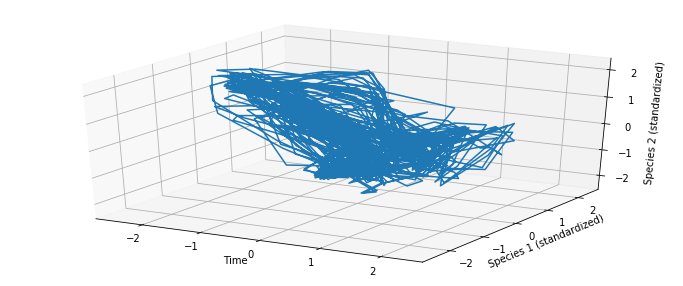

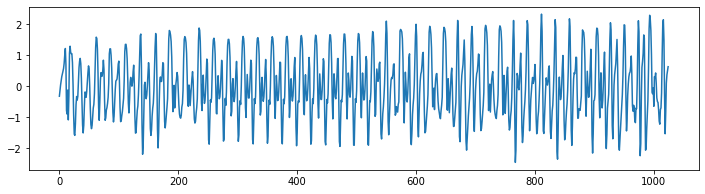

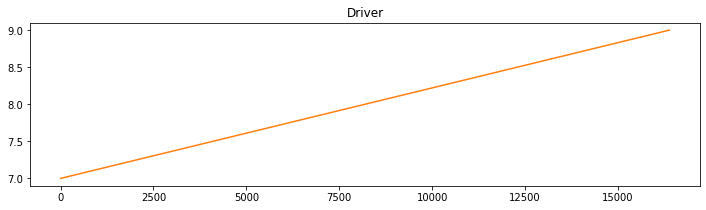

In [127]:
fig2 = plt.figure(2,figsize=(12,5))
"""
if dim == 1:
    ax2 = plt.subplot()
    ax2.plot(Xr[:,0],"b") # states
elif dim == 2:
    ax2 = plt.subplot()
    ax2.plot(Xr[:,0],Xr[:,1])
else:
    ax2 = fig2.gca(projection="3d")
    ax2.plot(Xr[:,0],Xr[:,1],Xr[:,2])
""" 
ax2 = fig2.gca(projection="3d")
# ax2.plot(t[settlingTime:],Xr[:,0],Xr[:,1])
ax2.plot(Xr[:-2*embst,0],Xr[1*embst:-1*embst,0],Xr[2*embst:,0])
# ax2.plot(Xr[:,0],Xr[:,1],Xr[:,2])
ax2.set_xlabel("Time")
ax2.set_ylabel("Species 1 (standardized)")
ax2.set_zlabel("Species 2 (standardized)")

# ax2.set_title("Density Dependent Maturation")
plt.savefig("Raw Data")

figTS, axTS = plt.subplots(dim,figsize=(12,dim*3))
if dim != 1:
    figTS, axTS = plt.subplots(dim,figsize=(12,dim*3))
    axTS[0].set_title("Cross section Time Series")
    for i in range(dim):
        axTS[i].set_title("Index: {ind}".format(ind=i))
        axTS[i].plot(Xr[:,i])
else:
    axTS.plot(Xr[:])
        
plt.savefig("Individual Dimensions")
        
if ndrivers != 0:
    figD, axD = plt.subplots(ndrivers, figsize=(12,ndrivers*3))
    if ndrivers == 1:
        axD.set_title("Driver")
        axD.plot(gtsr, c="tab:orange")
    else:
        axD[0].set_title("Driver(s)")
        for d in range(ndrivers):
            axD[d].plot(gtsr[:,d], c="tab:orange")
            
    plt.savefig("Drivers")
        
plt.show()

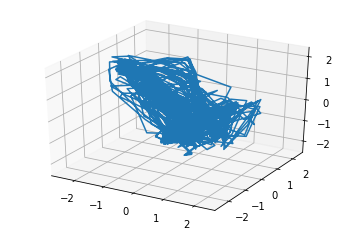

In [128]:
embst = 4

"""
figB = plt.figure(3,figsize=(12,5))

axB = figB.gca(projection="3d")
    ax2.plot(Xr[:,0],Xr[:,1],Xr[:,2])
"""
figB = plt.figure(3)
axB = figB.gca(projection="3d")
axB.plot(Xr[:-2*embst,0],Xr[1*embst:-1*embst,0],Xr[2*embst:,0])
plt.show()

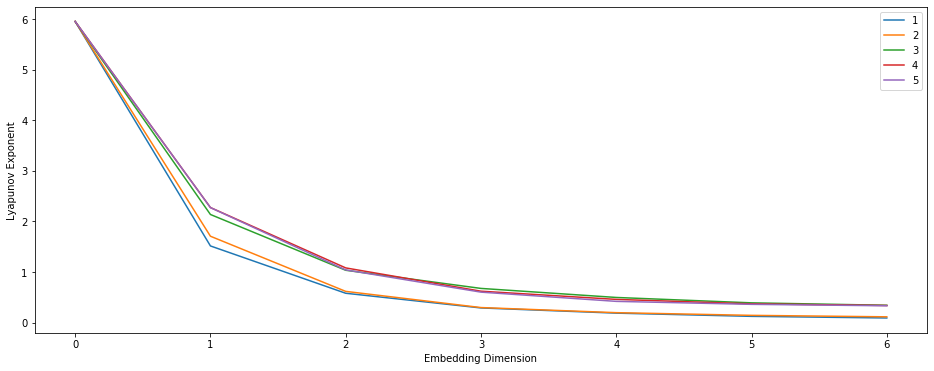

In [124]:
# False Nearest Neighbors Test

# Unitary Embedding Testing

l = 6
st = 5

# figFNN, axFNN = plt.subplots(2 * c,figsize=(16, 3*(2*c)))
figFNN, axFNN = plt.subplots(dim, figsize=(16, 6*dim))
# figFNN = plt.figure(figsize=(12, 8))
# axFNN = figFNN.add_subplot()

for d in range(dim):
    lyapExps = np.zeros(l+1)
    for s in range(1, st+1, 1):
        for i in range(l+1):
            Y, _ = delayEmbed(Xr[:,d,None], Xr[:,d,None], [i],s) # individual axis version
            # Y, _ = delayEmbed(Xr[::c], Xr[::c], [i]*dim,s)
            # Y, _ = delayEmbedUnitary(Xr[::c], Xr[::c], i,s)
            lyapExps[i] = lyapunovExp(Y)
            
        if dim == 1:
            axFNN.plot(range(l+1), lyapExps, label="{e}".format(e=s))
        else:
            axFNN[d].plot(range(l+1), lyapExps, label="{e}".format(e=s))

    if dim == 1:
        axFNN.legend()
        axFNN.set_xlabel("Embedding Dimension")
        # axFNN[c-1].set_title("Slice = {ind}".format(ind=c))
        axFNN.set_ylabel("Lyapunov Exponent")
    else:
        axFNN[d].legend()
        axFNN[d].set_xlabel("Embedding Dimension")
        # axFNN[c-1].set_title("Slice = {ind}".format(ind=c))
        axFNN[d].set_ylabel("Lyapunov Exponent")
    
plt.show()

In [129]:
# Normalize, split data
# states = (states - states.mean(0) ) / states.std(0) # normalize
# testTrainSplit = int(states.shape[0] * trainToTest)
testTrainSplit = int(Xr.shape[0] * trainToTest)

# X = states[:-1]
# Y = states[1:,]

predictionStepSize = 3

Xp = Xr[:-predictionStepSize]
Yp = Xr[predictionStepSize:,]
    
# Xt = np.column_stack((X[testTrainSplit:,], X[testTrainSplit-1:-1,1]))
X = Xp[:testTrainSplit,]
Y = Yp[:testTrainSplit,]


In [132]:
# # # GP SETUP # # #
gp.setCovar("sqrexp")
gp.setPrior(1,"half-normal")
gp.setPrior(2,"half-normal")
gp.setPrior(3,"exponential")
gp.setData(X,Y)
gp.setTimeDelayInterval(1)

assignment = [2]
gp.setTimeDelayEmbedding(assignment)
# print(gp.X)
numparams = 4
for i in range(numparams,numparams+sum(assignment)):
    gp.setPrior(i,"ARD")
embDim = sum(assignment)


#print(type(X),type(Y),type(assignment))


Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Data input success
tmp  (410, 3)
r  [4.8409 4.8409]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
New X Dimensions  (408, 3)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}


In [133]:
# setup training data
Xt = Xp[testTrainSplit:,]
Yt = Yp[testTrainSplit:,]
Xt, Yt = delayEmbed(Xt,Yt,assignment,1)

print(Xt.shape, Yt.shape)

(100, 3) (100, 1)


Gradient:  [-0.1229  0.3113  0.0456  0.6976  0.6318]
Likelihood:  21.312502336968624
Hp:  [0.45 0.62 0.62 0.22 0.22]  #  1
Gradient:  [-0.5056  0.4209  0.0945  0.5874  0.4618]
Likelihood:  86.44173152165523
Hp:  [0.39  0.764 0.764 0.364 0.364]  #  2
Gradient:  [-0.7541  0.3734  0.0944  0.4057  0.3441]
Likelihood:  135.62534326965562
Hp:  [0.318  0.9368 0.9368 0.5368 0.5368]  #  3
Gradient:  [-0.8225  0.339   0.0854  0.3263  0.308 ]
Likelihood:  180.3536838116519
Hp:  [0.2316 1.1442 1.1442 0.7442 0.7442]  #  4
Gradient:  [-0.6011  0.4765  0.1113  0.4261  0.4665]
Likelihood:  222.97694277195458
Hp:  [0.1279 1.393  1.393  0.993  0.993 ]  #  5
Gradient:  [0.5261 0.5123 0.15   0.4018 0.5262]
Likelihood:  261.68487622341297
Hp:  [0.1798 1.6916 1.6916 1.     1.    ]  #  6
Gradient:  [-0.9803  0.0836  0.015   0.1029  0.1457]
Likelihood:  267.90980168915365
Hp:  [0.1538 2.0499 2.0499 1.     1.    ]  #  7
Gradient:  [-0.9902  0.0362  0.0065  0.0743  0.1122]
Likelihood:  282.4450240220536
Hp:  [0

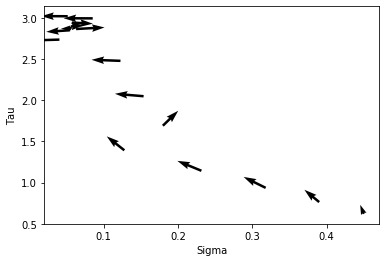

In [69]:
# optimize them parameters

gp.hyperParamOptimize(steps=20, yind=0) # <<<< THIS IS EXPENSIVE

In [70]:
# gp.setHP([0.1349,0.9134,0.1995,0.007, 1.,0.5832,0.3325,0.1837,0.5832,0.1165])
np.set_printoptions(precision=6,suppress=True)
print(gp.hp[3])

1.0


In [71]:
print(Yt.shape, Xt.shape)

(100, 1) (100, 3)


In [72]:
np.set_printoptions(precision=4,suppress=True)
print(gp.hp)

# One step predictions
predictions = np.zeros((len(Xt),dim))
variances = np.zeros((len(Xt),1))
for i in range(len(Xt)):
    predTuple = gp.predict(Xt[i])
    predictions[i] = predTuple[0] # list of one step prediction values for graphing
    variances[i] = predTuple[1]
    
diffTable = la.norm(Yt - predictions,axis=1)
# print("Predictions ", predictions)
# print("DiffTable ", diffTable)


[0.0548 2.8651 3.2756 1.     1.    ]


In [73]:
# feed forward prediction

print(Xt.shape)

n = Xt.shape[0] # num steps
feedForwardPrediction = np.zeros(Xt.shape)
feedForwardPrediction[0,] = Xt[0]
for i in range(n-1):
    feedForwardPrediction[i+1] = gp.predict(feedForwardPrediction[i])[0]


(100, 3)


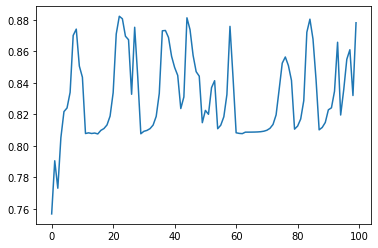

In [74]:
figA, axA = plt.subplots(1)
axA.plot(feedForwardPrediction[:,0])
plt.show()

Mean Squared Error:  0.026618214501922605


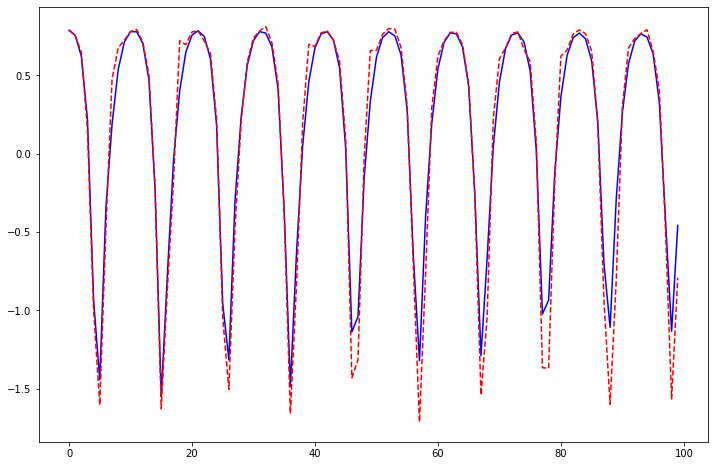

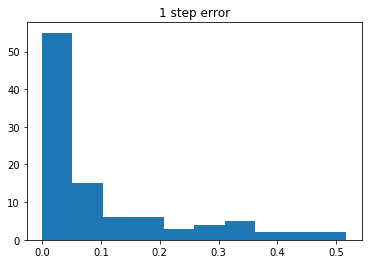

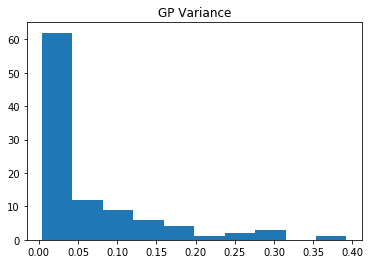

In [75]:
fig0 = plt.figure(0, figsize=(12,8))
if dim == 1:
    ax0 = plt.subplot()
    ax0.plot(Yt[:,0],"b") # states
    ax0.plot(predictions[:,0],'--r')
elif dim == 2:
    ax0 = plt.subplot()
    ax0.plot(Yt[:,0],Yt[:,1],"b") # states
    ax0.plot(predictions[:,0],predictions[:,1],'--r') # map of 1 step ahead predictions
else:
    ax0 = fig0.gca(projection="3d")
    ax0.plot(Yt[:,0],Yt[:,1],Yt[:,2],"b") # states
    ax0.plot(predictions[:,0],predictions[:,1],predictions[:,2],'--r') # map of 1 step ahead predictions
    # ax0.plot(feedForwardPrediction[:,0],feedForwardPrediction[:,1],feedForwardPrediction[:,2],'--g') # map of 50 step ahead prediction

plt.savefig("result-error_vs_actual.png")
    
fig1 = plt.figure(1)
plt.title("1 step error")
plt.hist(diffTable)

mse = sum(diffTable ** 2) / len(diffTable)
print("Mean Squared Error: ",mse)

plt.savefig("result-error_histogram.png")

fig2 = plt.figure(2)
plt.hist(variances)
plt.title("GP Variance")

if (dim > 1):
    fig, axIndDims = plt.subplots(dim, figsize = (12,dim*3))

    for d in range(dim):
        axIndDims[d].plot(Yt[:,d],"b")
        axIndDims[d].plot(predictions[:,d],"--r")

    plt.savefig("result-error_vs_actual_individual_dims.png")

plt.show()

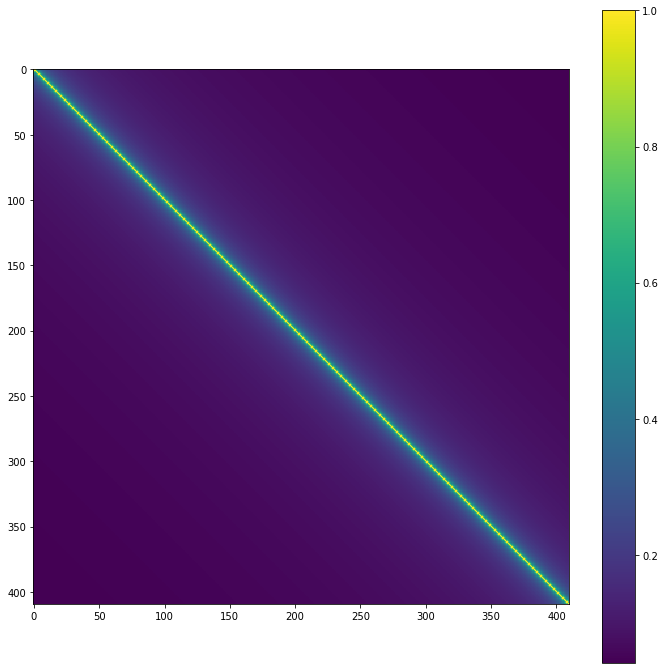

[0.0548 2.8651 3.2756 1.     1.    ]


In [76]:
nDrivers = 1

tau =  gp.hp[1]
phi = gp.hp[2]
aphi = gp.hp[3]

# putativeDriverCovarMatrix = np.fromfunction(lambda i,j: 1/np.sqrt(1+2*aphi*abs(i-j)),(X.shape[0],X.shape[0]))
putativeDriverCovarMatrix = np.fromfunction(lambda i,j: 1/(1+2*aphi*((i-j)**2))**(1/4),(X.shape[0],X.shape[0]))
# putativeDriverCovarMatrix = np.fromfunction(lambda i,j: tau*np.exp(-aphi*abs(i-j)**2/2),(X.shape[0],X.shape[0]))
#putativeDriverCovarMatrix = np.fromfunction(lambda i,j: aphi*np.minimum(i,j)/2,(X.shape[0],X.shape[0]))

figDriverCov, axDriverCov = plt.subplots(1,figsize=(12,12))
pltFigDriver = axDriverCov.imshow(putativeDriverCovarMatrix)
plt.colorbar(pltFigDriver)

"""
for i in range(nDrivers):
    axDriverCov[1].plot(rand.multivariate_normal(np.zeros(putativeDriverCovarMatrix.shape[0]),putativeDriverCovarMatrix))
"""

plt.show()
print(gp.hp)

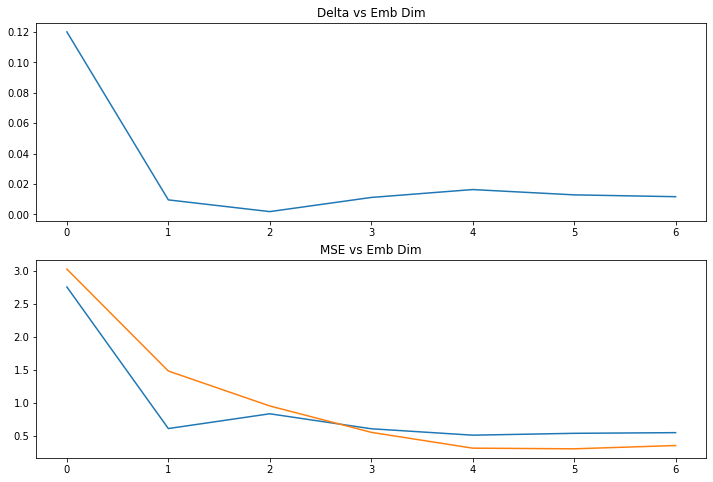

[0.0894 0.1687 0.2563 0.1622 0.1474 0.1565 0.1604]


In [57]:
# Some data on Forgetting with 256 point Density Dependent Maturation with linear driver

# timeseries = Xr

# Delta, MSE, embdim
fvo = np.array([[0.12015391,2.7547544645807007,0],[0.0094917, 0.6073570451226253,1],[0.00177367, 0.8314272899519868, 2],[0.0111 ,0.6042498806352785,3],[0.0163,0.5068177625432674,4],[0.0128 ,0.5351236614615388,5],[0.0116,0.5452384481848714,6]])

overembedding = np.array([[3.026,0],[1.48,1],[0.95,2],[0.55,3],[0.31,4],[0.30,5],[0.35,6]])

figFVO, axFVO = plt.subplots(2,figsize = (12,8))
axFVO[0].plot(fvo[:,2],fvo[:,0])
axFVO[0].set_title("Delta vs Emb Dim")
axFVO[1].plot(fvo[:,2],fvo[:,1])
axFVO[1].plot(overembedding[:,1], overembedding[:,0])
axFVO[1].set_title("MSE vs Emb Dim")
# axFVO[2].scatter(fvo[1:,0],fvo[1:,1])
# axFVO[2].set_title("Delta vs MSE")
plt.savefig("Overembedding vs Forgetting, Density Dependent Maturation")
plt.show()


print(1/(1+2*fvo[:,0]*(255**2))**(1/4))

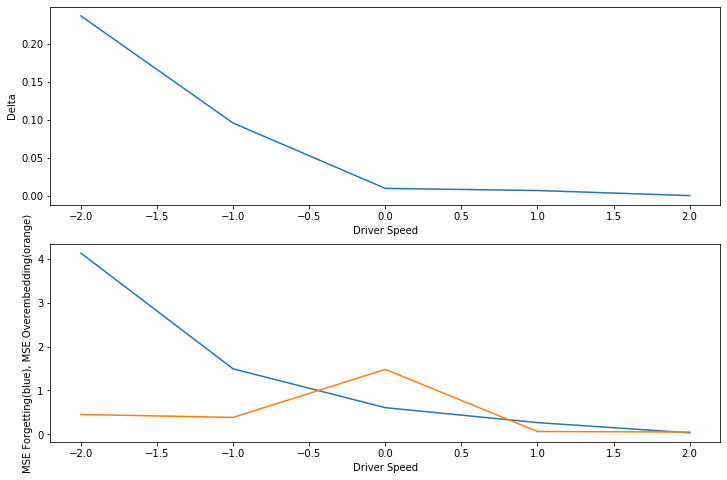

In [142]:
# Density Dependent Maturation MSE Forgetting/Overembedding as driver speed increases

# [MSE F, MSE O, delta, 2^(driver speed), emb dim]
FODriverSpeed = np.array([[4.133, 0.452, 0.2365, -2, 1],
                          [1.493, 0.3842,0.0955, -1, 1],
                          [0.607, 1.48, 0.0094917, 0, 1],
                          [0.266, 0.0627, 0.0067,  1, 1],
                          [0.033, 0.05066, 0,  2, 1]])

figSpeed, axSpeed = plt.subplots(2, figsize=(12,8))
axSpeed[0].plot(FODriverSpeed[:,3],FODriverSpeed[:,2])
axSpeed[0].set_ylabel("Delta")
axSpeed[0].set_xlabel("Driver Speed")
axSpeed[1].plot(FODriverSpeed[:,3], FODriverSpeed[:,0])
axSpeed[1].plot(FODriverSpeed[:,3], FODriverSpeed[:,1])
axSpeed[1].set_ylabel("MSE Forgetting(blue), MSE Overembedding(orange)")
axSpeed[1].set_xlabel("Driver Speed")
plt.savefig("Delta v Driver Speed")
plt.show()

In [ ]:
# Rosenzweig MacArthur, 512 datapoints

# delta, MSE forgetting, MSE Overembedding, emb dim, 
fvo1 = np.array([[0.158365, 12.978, 0.260, 0],
                 [0.0087, 3.821, 0.09533, 1],
                 [0.0019, 2.066, 0.09533, 1],
                 [,,,2]])

figFVO, axFVO = plt.subplots(3,figsize = (8,6))
axFVO[0].plot(fvo1[:,2],fvo1[:,0])
axFVO[0].set_title("Delta vs Emb Dim")
axFVO[1].plot(fvo1[:,2],fvo1[:,1])
axFVO[1].set_title("MSE vs Emb Dim")
axFVO[2].plot(fvo1[:,0],fvo1[:,1])
axFVO[2].set_title("Delta vs Emb Dim")
plt.show()

In [ ]:
print(gp.X)
np.savetxt("trainX.csv", gp.X, delimiter=",",fmt= '%.8f')
np.savetxt("trainY.csv", gp.Y, delimiter=",",fmt= '%.8f')
np.savetxt("testX.csv", Xt, delimiter=",",fmt= '%.8f')
np.savetxt("testY.csv", Yt, delimiter=",",fmt= '%.8f')


In [ ]:
fvo1 = [ [0.158365, 12.978, 0.26, 0],
         [0.0087, 3.821, 0.09533, 1],
         [0.0019, 2.066, 0.09533, 1],
         [0.00025194249999999996, 0.8362484902360978, 0.026618214501922605, 2],
         [0.00025194249999999996, 0.8362484902360978, 0.026618214501922605, 2],
         [0.00025194249999999996, 0.8362484902360978, 0.026618214501922605, 2],
         [0.0006046618599999999, 1.9237312761559484, 0.034957506074358866, 3],
         [0.0006046618599999999, 1.9237312761559484, 0.034957506074358866, 3],
         [0.0006046618599999999, 1.9237312761559484, 0.034957506074358866, 3]]


Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Data input success
tmp  (820, 2)
r  [4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
New X Dimensions  (819, 2)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Gradient:  [0.81029802 0.12712539 0.03992016 0.57066859]
Likelihood:  -485.93334916681357
Hp:  [0.62 0.62 0.62 0.22]  #  1
Gradient:  [0.8099662  0.20944014 0.06521325 0.54390883]
Likelihood:  -271.6532991352798
Hp:  [0.764 0.764 0.764 0.364]  #  2
Gradient:  [-0.39335051  0.40214223  0.13376938  0.81588158]
Likelihood:  -214.66300497995815
Hp:  [0.692  0.936

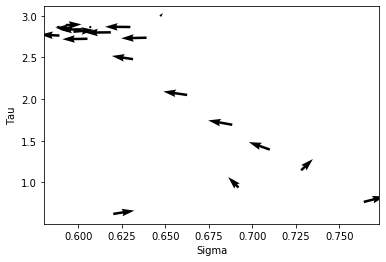

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Data input success
tmp  (820, 2)
r  [4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
New X Dimensions  (819, 2)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Gradient:  [-0.42089033  0.7272439  -0.2353398  -0.16504027  0.45972223]
Likelihood:  -179.8024417901959
Hp:  [0.45 0.62 0.45 0.45 0.22]  #  1
Gradient:  [-0.6951654   0.5348145  -0.30935216 -0.24791457  0.27121602]
Likelihood:  -117.64089283750566
Hp:  [0.39  0.764 0.39  0.39  0.364]  #  2
Gradient:  [-0.82746291  0.2807931  -0.34055368 -0.33967519  0.07144

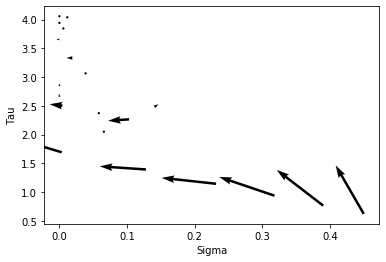

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Data input success
tmp  (820, 2)
r  [4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
New X Dimensions  (819, 2)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Gradient:  [0.81029802 0.12712539 0.03992016 0.57066859]
Likelihood:  -485.93334916681357
Hp:  [0.62 0.62 0.62 0.22]  #  1
Gradient:  [0.8099662  0.20944014 0.06521325 0.54390883]
Likelihood:  -271.6532991352798
Hp:  [0.764 0.764 0.764 0.364]  #  2
Gradient:  [-0.39335051  0.40214223  0.13376938  0.81588158]
Likelihood:  -214.66300497995815
Hp:  [0.692  0.936

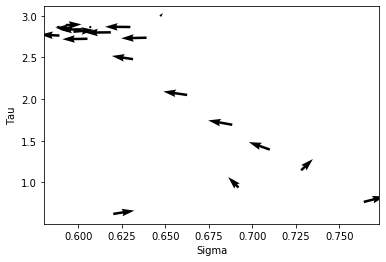

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Data input success
tmp  (820, 2)
r  [4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
New X Dimensions  (819, 2)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Gradient:  [-0.42089033  0.7272439  -0.2353398  -0.16504027  0.45972223]
Likelihood:  -179.8024417901959
Hp:  [0.45 0.62 0.45 0.45 0.22]  #  1
Gradient:  [-0.6951654   0.5348145  -0.30935216 -0.24791457  0.27121602]
Likelihood:  -117.64089283750566
Hp:  [0.39  0.764 0.39  0.39  0.364]  #  2
Gradient:  [-0.82746291  0.2807931  -0.34055368 -0.33967519  0.07144

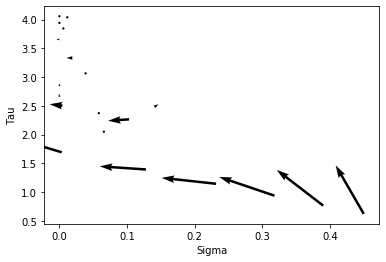

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Data input success
tmp  (820, 3)
r  [4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
New X Dimensions  (818, 3)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Gradient:  [0.80834408 0.17538129 0.08590736 0.37218629 0.41221176]
Likelihood:  -388.8553174045796
Hp:  [0.62 0.62 0.62 0.22 0.22]  #  1
Gradient:  [0.64354569 0.35274029 0.19105155 0.42406949 0.49506323]
Likelihood:  -205.0939127073785
Hp:  [0.764 0.

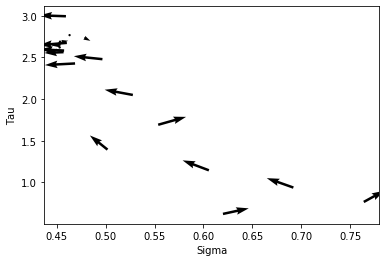

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Data input success
tmp  (820, 3)
r  [4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
New X Dimensions  (818, 3)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Gradient:  [-0.49038355  0.66033961 -0.21506723 -0.15968678  0.27756598  0.41794606]
Likelihood:  -159.90335014547847
Hp:  [0.45 0.62 0.45 0.45 0.22 0.22]  #  1
Gradient:  [-0.80326715  0.427

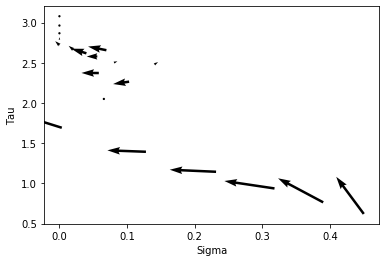

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Data input success
tmp  (820, 3)
r  [4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
New X Dimensions  (818, 3)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Gradient:  [0.80834408 0.17538129 0.08590736 0.37218629 0.41221176]
Likelihood:  -388.8553174045796
Hp:  [0.62 0.62 0.62 0.22 0.22]  #  1
Gradient:  [0.64354569 0.35274029 0.19105155 0.4240694

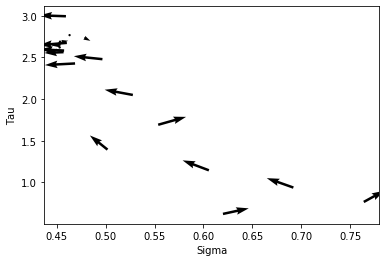

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Data input success
tmp  (820, 3)
r  [4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
New X Dimensions  (818, 3)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Gradient:  [-0.49038355  0.66033961 -0.21506723 -0.15968678  0.27756598  0.41794606]
Likelihood:  -159.90335014547847
Hp:  [0.45 0.62 0.45 0.45 0.22 0.22]  #  1
Gradient:  [-0.80326715  0.427

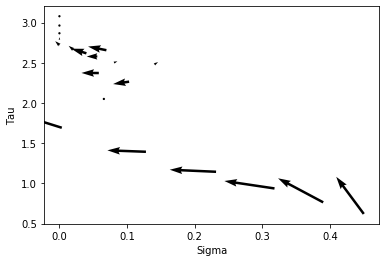

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Data input success
tmp  (820, 4)
r  [4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
New X Dimensions  (817, 4)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Gradient:  [0.68276476 0.24746142 0.08126102 0.42104821 0.25779768 0.4714

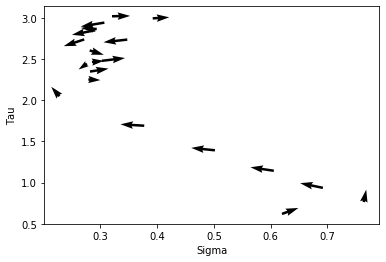

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Data input success
tmp  (820, 4)
r  [4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
New X Dimensions  (817, 4)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Gr

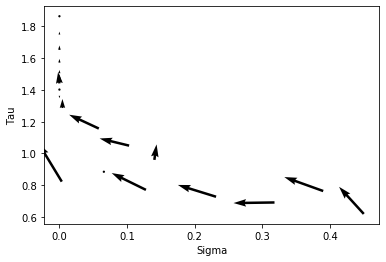

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Data input success
tmp  (820, 4)
r  [4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
New X Dimensions  (817, 4)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Gra

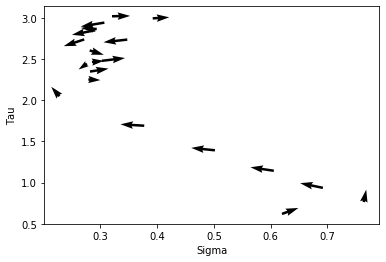

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Data input success
tmp  (820, 4)
r  [4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
New X Dimensions  (817, 4)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Gr

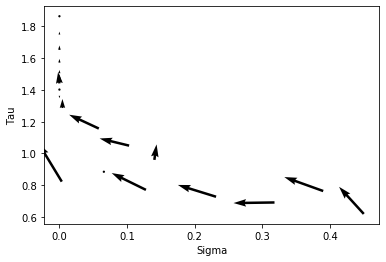

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Data input success
tmp  (820, 5)
r  [4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
New X Dimensions  (816, 5)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6:

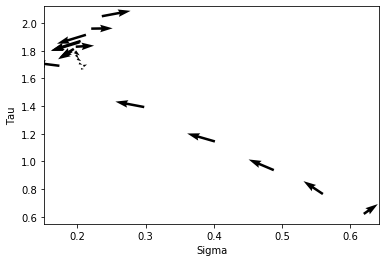

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Data input success
tmp  (820, 5)
r  [4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
New X Dimensions  (816, 5)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'h

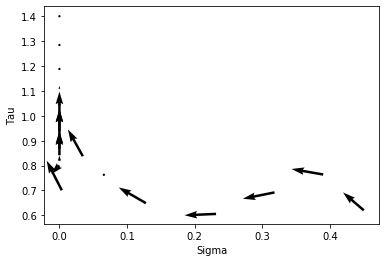

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Data input success
tmp  (820, 5)
r  [4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
New X Dimensions  (816, 5)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'ha

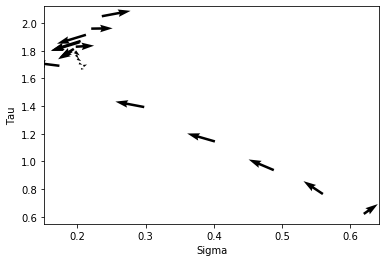

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Data input success
tmp  (820, 5)
r  [4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
New X Dimensions  (816, 5)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'h

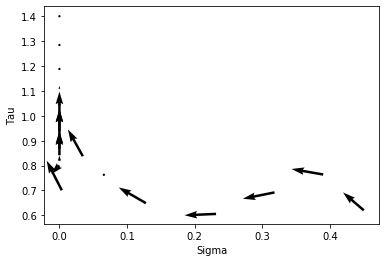

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Data input success
tmp  (820, 6)
r  [4.77475111 4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
New X Dimensions  (815, 6)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD'}
Prior dict  {0: 'no

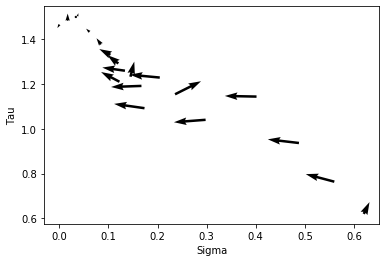

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Data input success
tmp  (820, 6)
r  [4.77475111 4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
New X Dimensions  (815, 6)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential'

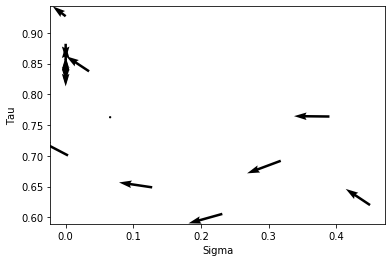

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Covariance function set to  sqrexp
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Data input success
tmp  (820, 6)
r  [4.77475111 4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
New X Dimensions  (815, 6)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential',

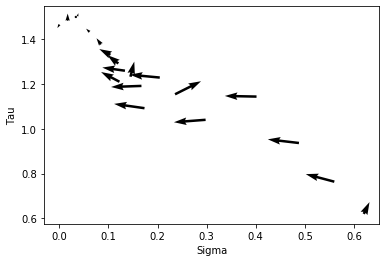

Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Covariance function set to  sqrexpf
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Data input success
tmp  (820, 6)
r  [4.77475111 4.77475111 4.77475111 4.77475111 4.77475111]
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
New X Dimensions  (815, 6)
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential', 4: 'ARD', 5: 'ARD', 6: 'ARD', 7: 'ARD', 8: 'ARD'}
Prior dict  {0: 'none', 1: 'half-normal', 2: 'half-normal', 3: 'exponential'

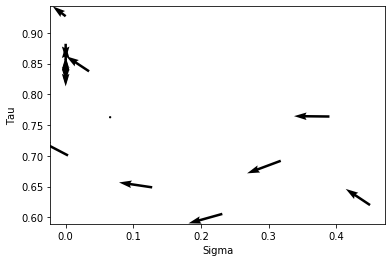

In [131]:
fvo2 = [[]]

nTriesPerDimension = 2
embeddingDimensionList = np.arange(1,6)

for e in embeddingDimensionList:
    for _ in range(nTriesPerDimension):
        gp.setCovar("sqrexp")
        gp.setPrior(1,"half-normal")
        gp.setPrior(2,"half-normal")
        gp.setPrior(3,"exponential")
        gp.setData(X,Y)
        gp.setTimeDelayInterval(1)

        assignment = [e]
        gp.setTimeDelayEmbedding(assignment)
        # print(gp.X)
        numparams = 4
        for i in range(numparams,numparams+sum(assignment)):
            gp.setPrior(i,"ARD")
        embDim = sum(assignment)
        
        # setup training data
        Xt = Xp[testTrainSplit:,]
        Yt = Yp[testTrainSplit:,]
        Xt, Yt = delayEmbed(Xt,Yt,assignment,1)
        
        gp.hyperParamOptimize(steps=20, yind=0) # <<<< THIS IS EXPENSIVE
        
        # One step predictions
        predictions = np.zeros((len(Xt),dim))
        variances = np.zeros((len(Xt),1))
        for i in range(len(Xt)):
            predTuple = gp.predict(Xt[i])
            predictions[i] = predTuple[0] # list of one step prediction values for graphing
            variances[i] = predTuple[1]

        diffTable = la.norm(Yt - predictions,axis=1)
        
        mseOver = sum(diffTable ** 2) / len(diffTable)
        
        # Run again for forgetting
        gp.setCovar("sqrexpf")
        gp.setPrior(1,"half-normal")
        gp.setPrior(2,"half-normal")
        gp.setPrior(3,"exponential")
        gp.setData(X,Y)
        gp.setTimeDelayInterval(1)

        assignment = [e]
        gp.setTimeDelayEmbedding(assignment)
        # print(gp.X)
        numparams = 4
        for i in range(numparams,numparams+sum(assignment)):
            gp.setPrior(i,"ARD")
        embDim = sum(assignment)
        
        # setup training data
        Xt = Xp[testTrainSplit:,]
        Yt = Yp[testTrainSplit:,]
        Xt, Yt = delayEmbed(Xt,Yt,assignment,1)
        
        gp.hyperParamOptimize(steps=20, yind=0) # <<<< THIS IS EXPENSIVE
        
        # One step predictions
        predictions = np.zeros((len(Xt),dim))
        variances = np.zeros((len(Xt),1))
        for i in range(len(Xt)):
            predTuple = gp.predict(Xt[i])
            predictions[i] = predTuple[0] # list of one step prediction values for graphing
            variances[i] = predTuple[1]

        diffTable = la.norm(Yt - predictions,axis=1)
        
        mseForgetting = sum(diffTable ** 2) / len(diffTable)
        deltaForgetting = gp.hp[3]
        
        fvo2.append([deltaForgetting, mseForgetting, mseOver, e])
        

[[], [0.12236358144000006, 2.9041599451706173, 0.8545779430453478, 1], [0.12236358144000006, 2.9041599451706173, 0.8545779430453478, 1], [0.12085595811840003, 3.754768692344247, 0.6526868297866213, 2], [0.12085595811840003, 3.754768692344247, 0.6526868297866213, 2], [0.08101815398400003, 10.661984213904649, 0.5345928275941844, 3], [0.08101815398400003, 10.661984213904649, 0.5345928275941844, 3], [0.040790499778560044, 8.29733430738009, 0.41508772759945994, 4], [0.040790499778560044, 8.29733430738009, 0.41508772759945994, 4], [0.028777990656000063, 7.844123677533502, 0.37588170692552225, 5], [0.028777990656000063, 7.844123677533502, 0.37588170692552225, 5]]


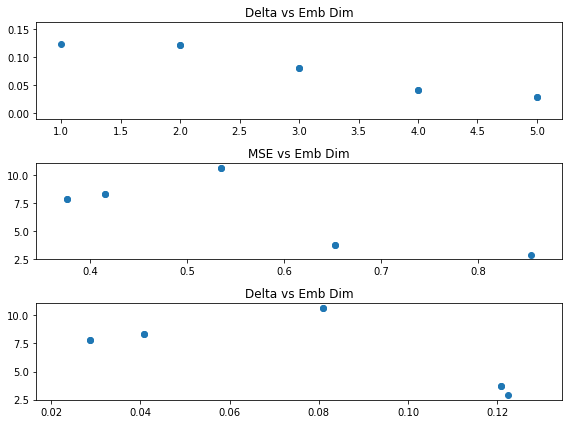

In [141]:
print(fvo2)
# [delta, mseForgetting, mseOverembedding, embedding dimension]
fvo2np = np.array([[0.12236358144000006, 2.9041599451706173, 0.8545779430453478, 1],
                   [0.12236358144000006, 2.9041599451706173, 0.8545779430453478, 1],
                   [0.12085595811840003, 3.754768692344247, 0.6526868297866213, 2],
                   [0.12085595811840003, 3.754768692344247, 0.6526868297866213, 2],
                   [0.08101815398400003, 10.661984213904649, 0.5345928275941844, 3],
                   [0.08101815398400003, 10.661984213904649, 0.5345928275941844, 3],
                   [0.040790499778560044, 8.29733430738009, 0.41508772759945994, 4],
                   [0.040790499778560044, 8.29733430738009, 0.41508772759945994, 4],
                   [0.028777990656000063, 7.844123677533502, 0.37588170692552225, 5],
                   [0.028777990656000063, 7.844123677533502, 0.37588170692552225, 5]])

figFVO2, axFVO2 = plt.subplots(3,figsize = (8,6))
axFVO2[0].scatter(fvo2np[1:,3],fvo2np[1:,0])
axFVO2[0].set_title("Delta vs Emb Dim")
axFVO2[1].scatter(fvo2np[1:,2],fvo2np[1:,1])
axFVO2[1].set_title("MSE vs Emb Dim")
axFVO2[2].scatter(fvo2np[1:,0],fvo2np[1:,1])
axFVO2[2].set_title("Delta vs Emb Dim")
figFVO2.tight_layout()
plt.show()

In [138]:
# print(fvo1)
fvo1 = np.array(fvo1)
figFVO, axFVO = plt.subplots(3,figsize = (8,6))
axFVO[0].scatter(fvo1[:,3],fvo1[:,0])
axFVO[0].set_title("Delta vs Emb Dim")
axFVO[1].scatter(fvo1[:,2],fvo1[:,1])
axFVO[1].set_title("MSE vs Emb Dim")
axFVO[2].scatter(fvo1[:,0],fvo1[:,1])
axFVO[2].set_title("Delta vs Emb Dim")
plt.show()

NameError: name 'fvo1' is not defined

In [88]:
print(fvo1)

[[ 0.1584 12.978   0.26    0.    ]
 [ 0.0087  3.821   0.0953  1.    ]
 [ 0.0019  2.066   0.0953  1.    ]
 [ 0.0003  0.8362  0.0266  2.    ]
 [ 0.0003  0.8362  0.0266  2.    ]
 [ 0.0003  0.8362  0.0266  2.    ]
 [ 0.0006  1.9237  0.035   3.    ]
 [ 0.0006  1.9237  0.035   3.    ]
 [ 0.0006  1.9237  0.035   3.    ]]
